In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from IPython.display import Image
import pydotplus

# Data Import and Preprocessing

In [ ]:
#load the data set
df = pd.read_csv('Employees.csv')
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Marital
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,Single
1,Bachelors,2013,Pune,1,28,Female,No,3,1,NaN
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,NaN
3,Masters,2016,Bangalore,3,27,Male,No,5,1,NaN
4,Masters,2017,Pune,3,24,Male,Yes,2,1,NaN


In [ ]:
print(df.isnull().values.any())

True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
 9   Marital                    1595 non-null   object
dtypes: int64(5), object(5)
memory usage: 363.6+ KB


In [ ]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0
Marital,3058


In [ ]:
df_cleaned=df.drop('Marital ', axis=1)

In [ ]:
df_cleaned.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_cleaned.select_dtypes(include=['object']).columns.tolist()

['Education', 'City', 'Gender', 'EverBenched']

In [ ]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [ ]:
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [ ]:
class_distribution = df_cleaned['LeaveOrNot'].value_counts()
print(class_distribution)

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


In [ ]:
# Separate features (X) and target (y)
X = df_cleaned.drop('LeaveOrNot', axis=1)
y = df_cleaned['LeaveOrNot']

In [ ]:
X.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2


In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
LeaveOrNot
0    3053
1    3053
Name: count, dtype: int64


# Training Model

In [ ]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, # Call train_test_split directly
                                                                    test_size=0.3, random_state=0)

In [ ]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Testing Model

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.78


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[864  58]
 [249 225]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       922
           1       0.80      0.47      0.59       474

    accuracy                           0.78      1396
   macro avg       0.79      0.71      0.72      1396
weighted avg       0.78      0.78      0.76      1396



[Text(0.5769230769230769, 0.875, 'x[1] <= 2017.5\nentropy = 0.93\nsamples = 3257\nvalue = [2131, 1126]'),
 Text(0.3076923076923077, 0.625, 'x[3] <= 2.5\nentropy = 0.869\nsamples = 2994\nvalue = [2126.0, 868.0]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[1] <= 2016.5\nentropy = 0.991\nsamples = 788\nvalue = [349, 439]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.838\nsamples = 433\nvalue = [116, 317]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.928\nsamples = 355\nvalue = [233, 122]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= 0.5\nentropy = 0.711\nsamples = 2206\nvalue = [1777, 429]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.636\nsamples = 1838\nvalue = [1543, 295]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.946\nsamples = 368\nvalue = [234.0, 134.0]'),
 Text(0.8461538461538461, 0.625, 'x[3] <= 1.5\nentropy = 0.136\nsamples = 263\nvalue = [5, 258]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375

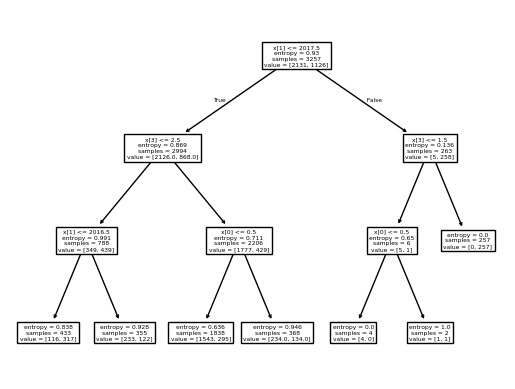

In [ ]:
tree.plot_tree(dtree)

# Visualization

In [ ]:
# Get feature importances from the trained decision tree model
importances = dtree.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Now you can use feature_importance_df as intended
important_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()
print(important_features)


['Education', 'JoiningYear', 'PaymentTier']


In [ ]:
# Dynamically generate class_names from the target variable (y_train or y)
class_names = y_train.unique().astype(str)  # Convert to string for compatibility
print(class_names)

['1' '0']


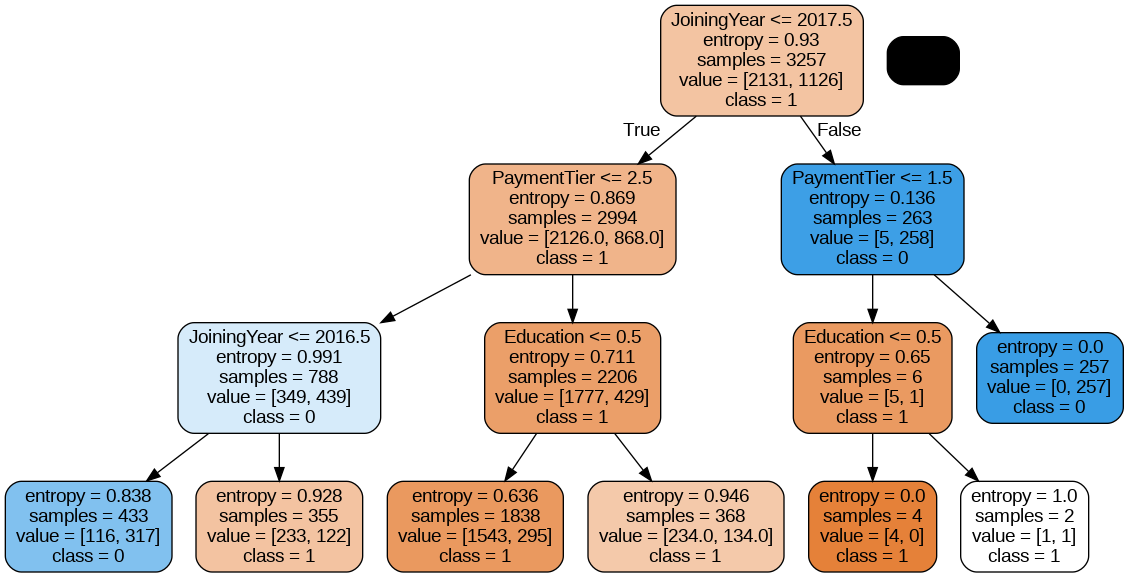

In [ ]:

# Export the decision tree to a DOT format
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  # Use the actual feature names
                                class_names=class_names)  # Use dynamically generated class names

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree image
display(Image(graph.create_png()))

